# Notebook pruebas Lab 2 DSP
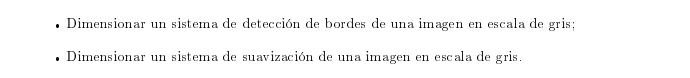

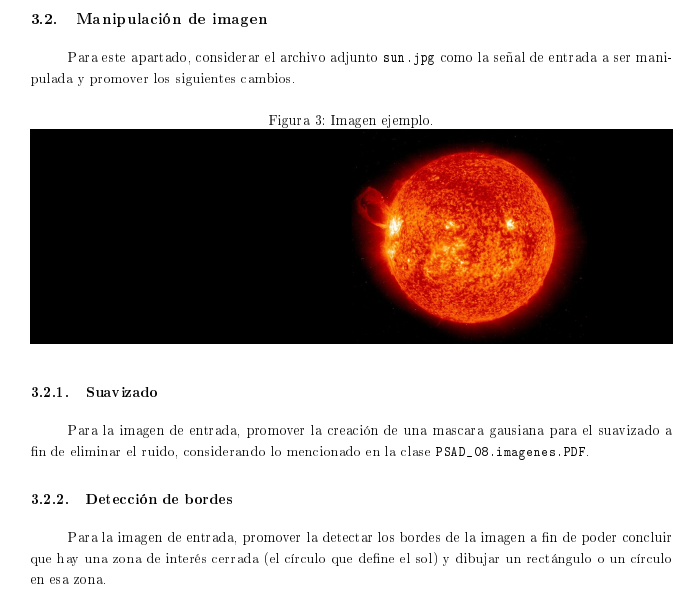

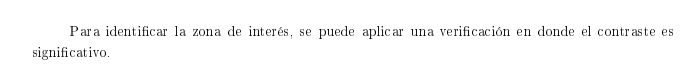


### 3.2.1 Suavizado

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import cv2
from IPython.display import Video, HTML, display
from PIL import Image
from scipy.signal import convolve2d
cv2.__version__

'4.12.0'

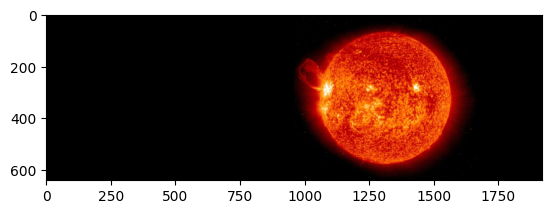

(640, 1920, 3)


In [4]:
img = cv2.imread("images/sun.jpg", 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img,cmap='gray')
plt.show()
print(np.shape(img))

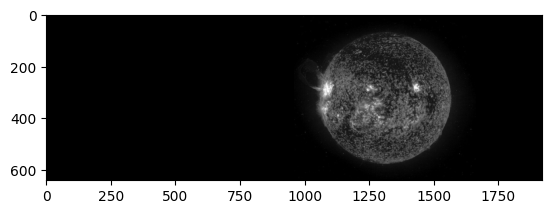

In [7]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray_img = rgb2gray(cv2.imread("images/sun.jpg",1))

plt.imshow(gray_img,cmap='gray')
plt.show()

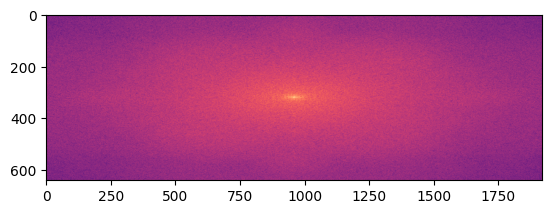

In [8]:
IMG = np.fft.fft2(gray_img)
IMG = np.fft.fftshift(IMG)
magnitude_spectrum = 20*np.log(np.abs(IMG))
plt.imshow(magnitude_spectrum, cmap = 'magma') 
plt.show()

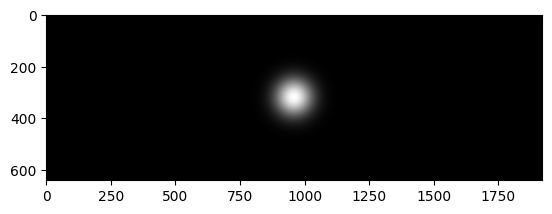

In [34]:
sigma_x, sigma_y = 50, 50 # 26, 26
(ncols, nrows) = np.shape(gray_img)
c_x, c_y = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
gaussian_mask = np.exp(-((X-c_x)**2 + (Y-c_y)**2)/(2*sigma_x**2)) / (2*np.pi*sigma_x**2)
plt.imshow(gaussian_mask, cmap = 'gray')
plt.show()

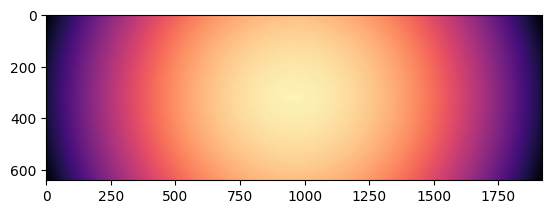

In [35]:
filtered_IMG = IMG * gaussian_mask
plt.imshow(20*np.log(np.abs(filtered_IMG)), cmap = 'magma')
plt.show()

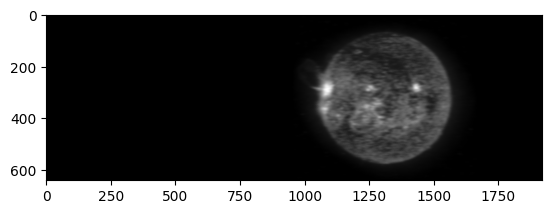

In [36]:
ifft_img = np.fft.ifft2(filtered_IMG)
plt.imshow(np.abs(ifft_img), cmap = 'gray')
plt.show()

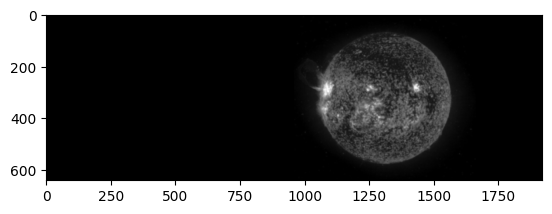

In [61]:
# con cv2
gauss_img = cv2.GaussianBlur(gray_img, (7, 7), 0)
plt.imshow(gauss_img, cmap='gray')
plt.show()

### 3.2.2 Detección de bordes

/tmp/ipykernel_11345/1932549180.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  gray_u8 = ifft_img.astype(np.uint8)


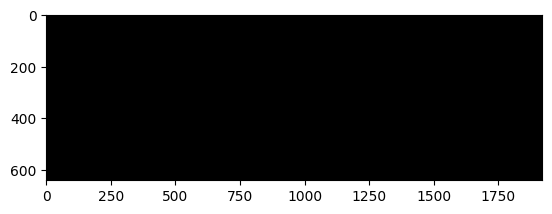

In [111]:
gray_u8 = ifft_img.astype(np.uint8)
bordes = cv2.Canny(gray_u8, 110, 250, 15)
plt.imshow(bordes, cmap='gray')
plt.show()

Suavizado y detección de bordes son de cierta forma opuestas, si se suaviza mucho la imagen es mucho más dificil encontrar bordes porque los gradientes son menores.

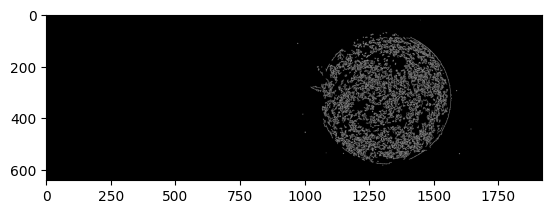

In [132]:
gray_u8 = gray_img.astype(np.uint8)
bordes = cv2.Canny(gray_u8, 110, 250, 15)
plt.imshow(bordes, cmap='gray')
plt.show()

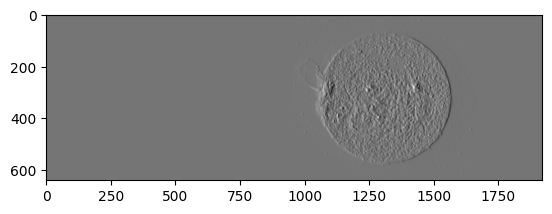

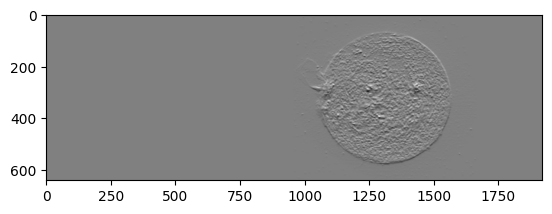

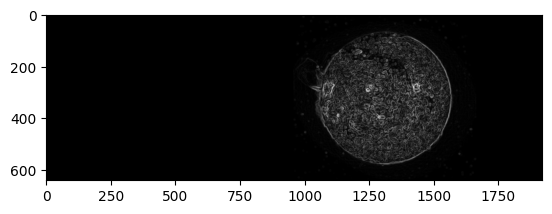

In [ ]:
gray_u8 = gray_img.astype(np.uint8)
sobelx = cv2.Sobel(gray_u8, cv2.CV_64F, 1, 0, ksize=15)
sobely = cv2.Sobel(gray_u8, cv2.CV_64F, 0, 1, ksize=15)
sobel = cv2.magnitude(sobelx, sobely)
plt.imshow(sobelx, cmap='gray')
plt.show()
plt.imshow(sobely, cmap='gray')
plt.show()
plt.imshow(sobel, cmap='gray')
plt.show()

cantidad de circulos encontrados: 1


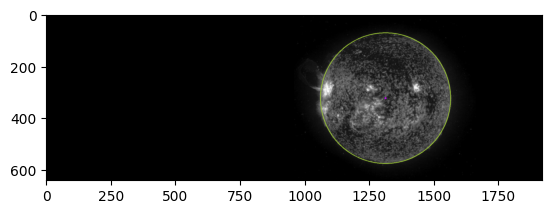

In [196]:
gauss_img = cv2.GaussianBlur(gray_img, (3, 3), 0)
in_img = gauss_img.astype(np.uint8)
circles = cv2.HoughCircles(in_img, cv2.HOUGH_GRADIENT, 2.5, 500, minRadius=200,maxRadius=320)
print("cantidad de circulos encontrados:", circles.shape[1] if circles is not None else 0)
cimg = cv2.cvtColor(in_img, cv2.COLOR_GRAY2BGR)
if circles is not None:
    circles = np.uint16(np.around(circles)) # redefinir tipo de datos
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(cimg,(i[0],i[1]),i[2],(155,200,50),2) # dibujar los circulos identificados en verde (BGR)
        # draw the center of the circle
        cv2.circle(cimg,(i[0],i[1]),2,(200,0,255),3) # dibujar los centros de circulos identificados en rojo (BGR)

plt.imshow(cimg,cmap='gray')
plt.show()

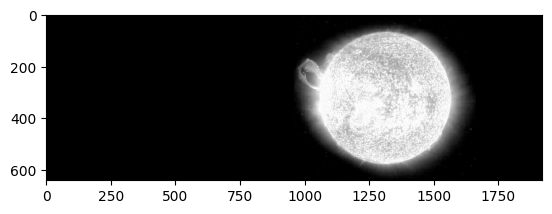

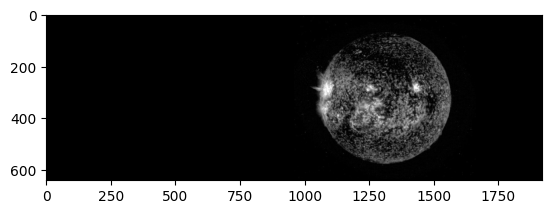

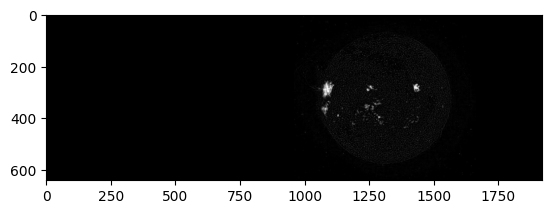

In [201]:
for channel in range(3):
    plt.imshow(img[...,channel], cmap='gray')
    plt.show()